Data Preparation

In [18]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#load dataset
df = pd.read_csv('./dataset/bank-additional.csv', sep=';')
df

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [8]:
df.shape

(4119, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

EDA Bank Data

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [1]:
import pandas as pd
pd.set_option('display.max.columns',None)
df = pd.read_csv('./dataset/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [2]:
list_of_feature = ['age','job','marital','education','housing','loan']
print('list of choosen feature: ', list_of_feature)

df[list_of_feature].describe()

list of choosen feature:  ['age', 'job', 'marital', 'education', 'housing', 'loan']


,age
count,4119.000000
mean,40.113620
std,10.313362
min,18.000000
25%,32.000000
50%,38.000000
75%,47.000000
max,88.000000


In [3]:
for x in list_of_feature:
    print(df[x].value_counts(), '\n')

32    216
31    191
30    177
34    174
35    172
     ... 
82      2
86      2
88      1
19      1
85      1
Name: age, Length: 67, dtype: int64 

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64 

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64 

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64 

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64 

no         3349
yes         665
unknown     105
Name: loan, dtype: int64 



In [4]:
df[(df['education']!='illiterate')][list_of_feature].head()

,age,job,marital,education,housing,loan
0,30,blue-collar,married,basic.9y,yes,no
1,39,services,single,high.school,no,no
2,25,services,married,high.school,yes,no
3,38,services,married,basic.9y,unknown,unknown
4,47,admin.,married,university.degree,yes,no


In [5]:
print('total data after deleting unuse row: ', len(df[(df['education']!='illiterate')][list_of_feature]))

total data after deleting unuse row:  4118


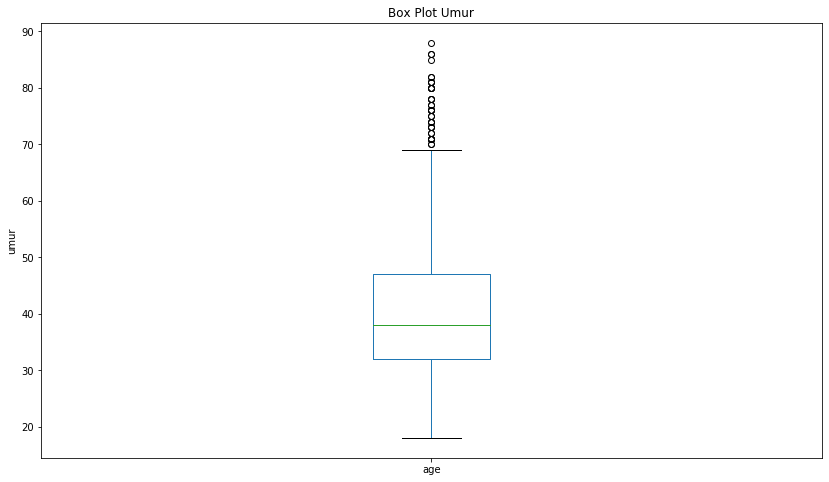

In [12]:
df['age'].plot(kind='box',figsize=(14,8))
plt.title('Box Plot Umur')
plt.ylabel('umur')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
job_label = df['job'].values
print('data job before: ', job_label)
label_encoder = LabelEncoder().fit(job_label)
job_label_after = label_encoder.transform(job_label)
print('data job after: ', job_label_after)
print('class before transform : ', label_encoder.classes_)

data job before:  ['blue-collar' 'services' 'services' ... 'student' 'admin.' 'management']
data job after:  [1 7 7 ... 8 0 4]
class before transform :  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [21]:
from sklearn.preprocessing import LabelEncoder
target_label=df['y'].values
print('data job before:',target_label)
label_encoder=LabelEncoder().fit(target_label)
target_label_after=label_encoder.transform(target_label)
print('data job after', target_label_after)
print('class before transform:',label_encoder.classes_)

data job before: ['no' 'no' 'no' ... 'no' 'no' 'no']
data job after [0 0 0 ... 0 0 0]
class before transform: ['no' 'yes']


In [15]:
df['job_label_encode'] = job_label_after
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_label_encode
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,7
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,7
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,7
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [22]:
df['target_label_encode'] = target_label_after
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_label_encode,target_label_encode
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,7,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,7,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,7,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0


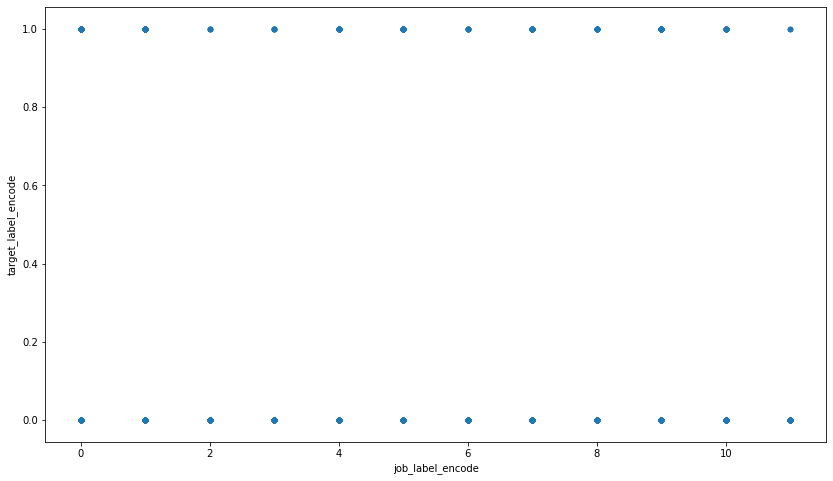

In [24]:
df_month_target = df[['job_label_encode','target_label_encode']]
df_month_target.plot(kind='scatter',x='job_label_encode',y='target_label_encode', figsize=(14,8))
plt.show()

In [30]:
job_target_group = df.groupby(by=['job','y'])['job'].count()

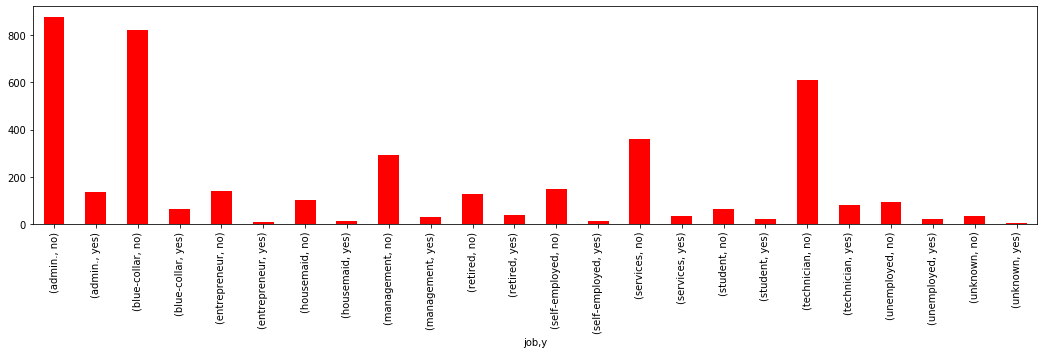

In [32]:
job_target_group.plot(kind='bar',figsize=(18,4),color='red')
plt.show()

In [33]:
list_of_feature = ['month','day_of_week','duration','campaign']
print('list of choosen feature: ',list_of_feature)

df[list_of_feature].describe()

list of choosen feature:  ['month', 'day_of_week', 'duration', 'campaign']


,duration,campaign
count,4119.000000,4119.000000
mean,256.788055,2.537266
std,254.703736,2.568159
min,0.000000,1.000000
25%,103.000000,1.000000
50%,181.000000,2.000000
75%,317.000000,3.000000
max,3643.000000,35.000000


In [34]:
for x in list_of_feature:
    print(df[x].value_counts(), '\n')

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64 

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64 

77     24
112    23
73     22
81     21
90     20
       ..
486     1
490     1
494     1
502     1
0       1
Name: duration, Length: 828, dtype: int64 

1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
15       2
29       2
19       2
23       2
22       2
27       1
24       1
18       1
35       1
Name: campaign, dtype: int64 



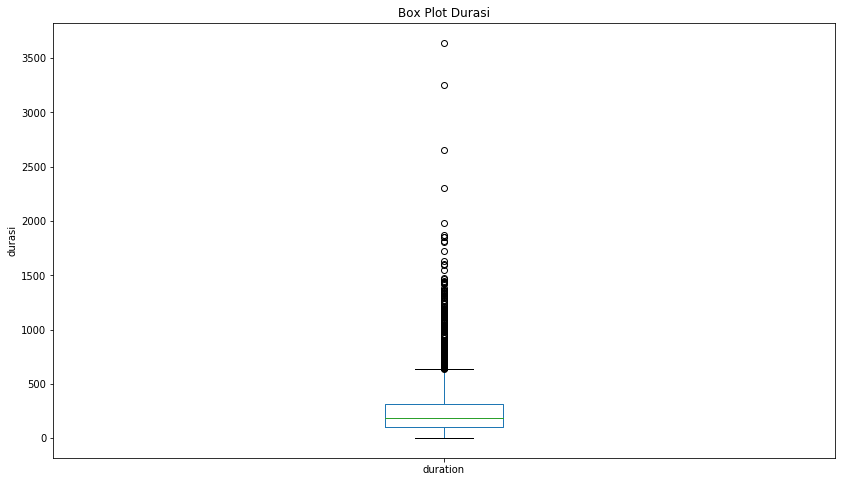

In [35]:
df['duration'].plot(kind='box',figsize=(14,8))
plt.title('Box Plot Durasi')
plt.ylabel('durasi')
plt.show()

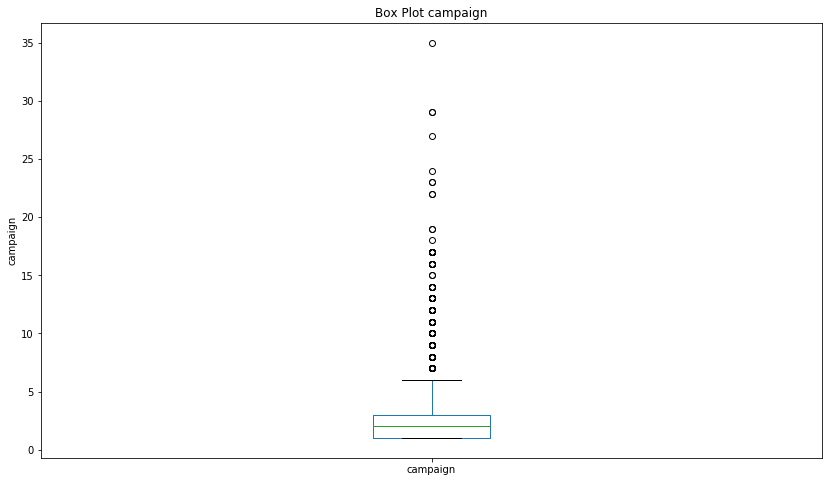

In [36]:
df['campaign'].plot(kind='box',figsize=(14,8))
plt.title('Box Plot campaign')
plt.ylabel('campaign')
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
month_label = df['month'].values
print('data month before: ', month_label)
label_encoder = LabelEncoder().fit(month_label)
month_label_after = label_encoder.transform(month_label)
print('data month after: ', month_label_after)
print('class before transform : ', label_encoder.classes_)

data month before:  ['may' 'may' 'jun' ... 'may' 'aug' 'nov']
data month after:  [6 6 4 ... 6 1 7]
class before transform :  ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


In [44]:
from sklearn.preprocessing import LabelEncoder
day_of_week_label = df['day_of_week'].values
print('data day of week before: ', day_of_week_label)
label_encoder = LabelEncoder().fit(day_of_week_label)
day_of_week_label_after = label_encoder.transform(day_of_week_label)
print('data day of week after: ', day_of_week_label_after)
print('class before transform : ', label_encoder.classes_)

data day of week before:  ['fri' 'fri' 'wed' ... 'mon' 'fri' 'wed']
data day of week after:  [0 0 4 ... 1 0 4]
class before transform :  ['fri' 'mon' 'thu' 'tue' 'wed']


In [38]:
from sklearn.preprocessing import LabelEncoder
target_label=df['y'].values
print('data month before:',target_label)
label_encoder=LabelEncoder().fit(target_label)
target_label_after=label_encoder.transform(target_label)
print('data month after', target_label_after)
print('class before transform:',label_encoder.classes_)

data month before: ['no' 'no' 'no' ... 'no' 'no' 'no']
data month after [0 0 0 ... 0 0 0]
class before transform: ['no' 'yes']


In [39]:
from sklearn.preprocessing import LabelEncoder
target_label=df['y'].values
print('data day of week before:',target_label)
label_encoder=LabelEncoder().fit(target_label)
target_label_after=label_encoder.transform(target_label)
print('data day of week after', target_label_after)
print('class before transform:',label_encoder.classes_)

data day of week before: ['no' 'no' 'no' ... 'no' 'no' 'no']
data day of week after [0 0 0 ... 0 0 0]
class before transform: ['no' 'yes']


In [43]:
df['month_label_encode'] = month_label_after
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_label_encode,target_label_encode,month_label_encode
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,0,6
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,7,0,6
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,7,0,4
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,7,0,4
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,7


In [45]:
df['day_of_week_label_encode'] = day_of_week_label_after
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_label_encode,target_label_encode,month_label_encode,day_of_week_label_encode
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,0,6,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,7,0,6,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,7,0,4,4
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,7,0,4,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,7,1


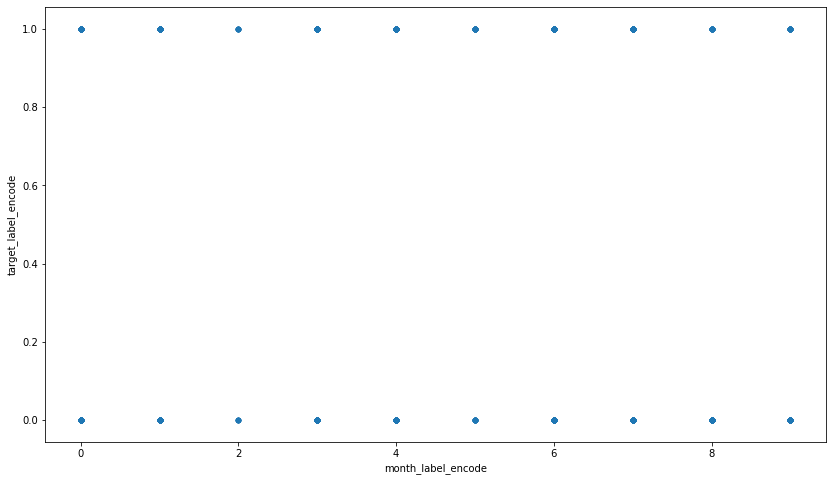

In [47]:
df_month_target = df[['month_label_encode','target_label_encode']]
df_month_target.plot(kind='scatter',x='month_label_encode',y='target_label_encode', figsize=(14,8))
plt.show()

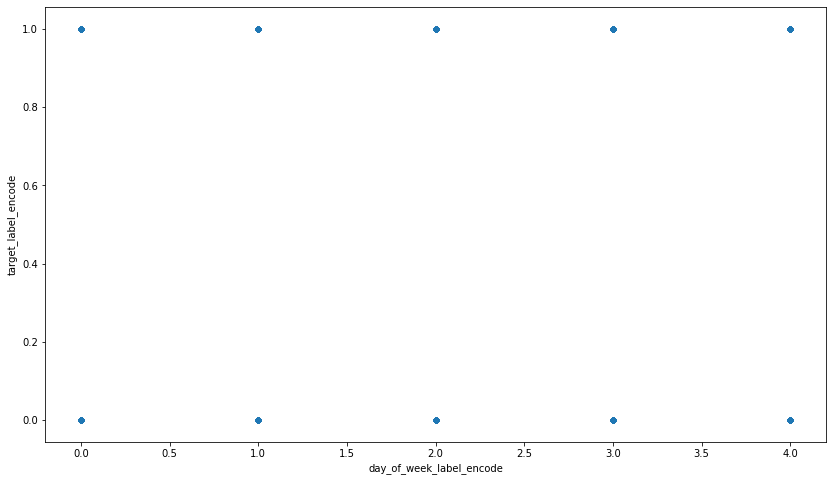

In [49]:
df_day_of_week_target = df[['day_of_week_label_encode','target_label_encode']]
df_day_of_week_target.plot(kind='scatter',x='day_of_week_label_encode',y='target_label_encode', figsize=(14,8))
plt.show()

Training Time

In [50]:
df[['age', 'target_label_encode']].head()

,age,target_label_encode
0,30,0
1,39,0
2,25,0
3,38,0
4,47,0


In [61]:
from sklearn.model_selection import train_test_split

features_data = df[['age']].values.reshape(-1,1)
target_data = df[['target_label_encode']].values.reshape(-1,1)

train_test_split(features_data,target_data,test_size=0.25)
x_train,x_test,y_train,y_test = train_test_split(features_data,target_data,test_size=0.25)

print('shape feature total: ',features_data.shape)
print('shape feature train: ',x_train.shape)
print('shape feature test: ',x_test.shape)

shape feature total:  (4119, 1)
shape feature train:  (3089, 1)
shape feature test:  (1030, 1)


Creating Model

In [80]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB().fit(x_train,y_train)
model


C:\Users\LitbangMet\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_train_prediksi = model.predict(x_train)
y_train_prediksi

array([1, 0, 0, ..., 0, 0, 0])

In [86]:
performance_model = model.score(x_train,y_train)
print('performance data train: ', performance_model)

performance data train:  0.8925218517319521


In [66]:
from sklearn.metrics import confusion_matrix

hasil_confusion_matrix = confusion_matrix(y_train,y_train_prediksi)
hasil_confusion_matrix

array([[2744,   13],
       [ 319,   13]], dtype=int64)

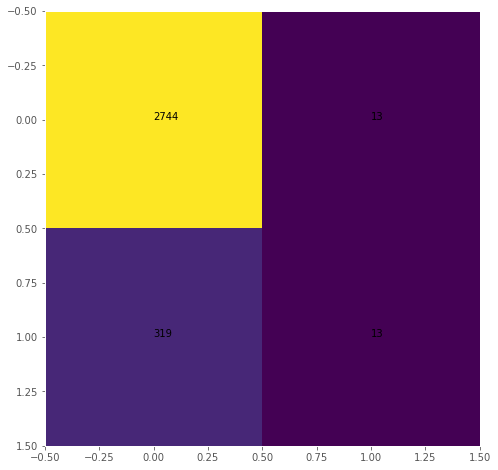

In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use(['ggplot'])

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(hasil_confusion_matrix)
ax.grid(False)
for i in range(len(hasil_confusion_matrix[0])):
    for j in range(len(hasil_confusion_matrix[0])):
        ax.text(j,i,hasil_confusion_matrix[i,j])
plt.show()

In [88]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model = GaussianNB().fit(x_train,y_train)
#model
model1 = DecisionTreeClassifier().fit(x_train,y_train)
model1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
y_train_prediksi1 = model1.predict(x_test)
y_train_prediksi1

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
performance_model1 = model1.score(x_train,y_train)
print('performance data train: ', performance_model1)

performance data test:  0.8951116866299773


In [85]:
from sklearn.metrics import confusion_matrix

hasil_confusion_matrix = confusion_matrix(y_train,y_train_prediksi)
hasil_confusion_matrix

array([[2744,   13],
       [ 319,   13]], dtype=int64)

In [74]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#model = GaussianNB().fit(x_train,y_train)
#model
#model1 = DecisionTreeClassifier().fit(x_train,y_train)
#model1
model2 = RandomForestClassifier().fit(x_train,y_train)
model2

C:\Users\LitbangMet\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_train_prediksi2 = model2.predict(x_train)
y_train_prediksi2

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
y_test_prediksi = model2.predict(x_test)
y_test_prediksi

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
y_test_prediksi = model2.predict(x_test)
performance_model_test = model2.score(x_test,y_test_prediksi)
print('performance data test: ', performance_model_test)

performance data test:  1.0


In [96]:
hasil_confusion_matrix_train = confusion_matrix(x_train,y_train_prediksi)
hasil_confusion_matrix_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use(['ggplot'])

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(hasil_confusion_matrix_train)
ax.grid(False)
for i in range(len(hasil_confusion_matrix_train[0])):
    for j in range(len(hasil_confusion_matrix_train[0])):
        ax.text(j,i,hasil_confusion_matrix_train[i,j])
plt.show()

KeyboardInterrupt: 

In [93]:
performance_model2 = model2.score(x_train,y_train_prediksi2)
print('performance data train2: ', performance_model2)

performance data train2:  1.0


In [54]:
df[['month', 'target_label_encode']].head()

,month,target_label_encode
0,may,0
1,may,0
2,jun,0
3,jun,0
4,nov,0


In [55]:
from sklearn.model_selection import train_test_split

features_data = df[['month']].values.reshape(-1,1)
target_data = df[['target_label_encode']].values.reshape(-1,1)

train_test_split(features_data,target_data,test_size=0.25)
x_train,x_test,y_train,y_test = train_test_split(features_data,target_data,test_size=0.25)

print('shape feature total: ',features_data.shape)
print('shape feature train: ',x_train.shape)
print('shape feature test: ',x_test.shape)

shape feature total:  (4119, 1)
shape feature train:  (3089, 1)
shape feature test:  (1030, 1)


In [56]:
df[['day_of_week', 'target_label_encode']].head()

,day_of_week,target_label_encode
0,fri,0
1,fri,0
2,wed,0
3,fri,0
4,mon,0


In [57]:
from sklearn.model_selection import train_test_split

features_data = df[['day_of_week']].values.reshape(-1,1)
target_data = df[['target_label_encode']].values.reshape(-1,1)

train_test_split(features_data,target_data,test_size=0.25)
x_train,x_test,y_train,y_test = train_test_split(features_data,target_data,test_size=0.25)

print('shape feature total: ',features_data.shape)
print('shape feature train: ',x_train.shape)
print('shape feature test: ',x_test.shape)

shape feature total:  (4119, 1)
shape feature train:  (3089, 1)
shape feature test:  (1030, 1)
